In [1]:
password = None

In [2]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import getpass
import pandas as pd
import numpy as np

from utils import load_json_benchmarks, filter_results, plot_comparison

In [3]:
repetitions = 10

In [4]:
if password is None:
    password = getpass.getpass()

In [5]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [6]:
# reenable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g powersave

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [7]:
libraries = [
    ("benchmark-fbdtemme-bencode.json",         "fbdtemme/bencode"),
    ("benchmark-jimporter-bencode.json",        "jimporter/bencode"),
    ("benchmark-jimporter-bencode-boost.json",  "jimporter/bencode (boost)"),
    ("benchmark-arvidn-libtorrent.json",        "arvidn/libtorrent"),
    ("benchmark-s3rvac-cpp-bencoding.json",     "s3rvac/cpp-bencoding"),
    ("benchmark-rakshasa-libtorrent.json",      "rakshasa/libtorrent"),
    # ("benchmark-kriben-bencode.json",           "kriben/bencode"),
    ("benchmark-theanti9-cppbencode.json",      "theanti9/cppbencode"),
    ("benchmark-outputenable-bencode.json",     "outputenable/bencode"),
    ("benchmark-aetf-qbencode.json",            "Aetf/QBencode"),
    ("benchmark-s3ponia-bencodeparser.json",    "s3ponia/BencodeParser"),

    # ("benchmark-irajul-bencode.json",           "iRajul/bencode"),    // Invalid parser
]

df = pd.concat([
    filter_results(load_json_benchmarks(result), lib_name) for result, lib_name in libraries
])

                                 name  family_index  \
0            BM_decode_value/"ubuntu"             0   
1            BM_decode_value/"ubuntu"             0   
2            BM_decode_value/"ubuntu"             0   
3            BM_decode_value/"ubuntu"             0   
4            BM_decode_value/"ubuntu"             0   
..                                ...           ...   
135         BM_decode_view/"integers"             9   
136    BM_decode_view/"integers"_mean             9   
137  BM_decode_view/"integers"_median             9   
138  BM_decode_view/"integers"_stddev             9   
139      BM_decode_view/"integers"_cv             9   

     per_family_instance_index                   run_name   run_type  \
0                            0   BM_decode_value/"ubuntu"  iteration   
1                            0   BM_decode_value/"ubuntu"  iteration   
2                            0   BM_decode_value/"ubuntu"  iteration   
3                            0   BM_decode_value/"u

In [8]:
grouped_df = df.groupby(["library", "test_type", "test_file"])["bytes_per_second"]
results = pd.DataFrame({"mean" : grouped_df.mean(), "stddev": grouped_df.std()})


In [9]:
results_value = results.loc[results.index.get_level_values("test_type") == "decode_value", :]
results_value = results_value.droplevel(1)

drop_list = ["arvidn/libtorrent", "outputenable/bencode"]

for lib_name in drop_list:
    results_value = results_value.drop(index=lib_name)

results_value[~np.isfinite(results_value)] = 0

In [11]:
drop_list = ["s3rvac/cpp-bencoding", 
             "rakshasa/libtorrent", "theanti9/cppbencode", 
             "Aetf/QBencode", "s3ponia/BencodeParser"]

results_view = results.loc[results.index.get_level_values("test_type") == "decode_view", :]
results_view = results_view.droplevel(1)
for lib_name in drop_list:
    results_view = results_view.drop(index=lib_name)

results_view

mean        stddev
library                   test_file                             
arvidn/libtorrent         camelyon17  9.091199e+10  3.015410e+10
                          covid       1.916587e+09  6.356933e+08
                          integers    1.051839e+09  3.488633e+08
                          pneumonia   1.388468e+09  4.605136e+08
                          ubuntu      1.728361e+11  5.732516e+10
fbdtemme/bencode          camelyon17  1.018193e+11  3.376989e+10
                          covid       2.239400e+09  7.427786e+08
                          integers    1.436429e+09  4.764222e+08
                          pneumonia   1.369976e+09  4.543877e+08
                          ubuntu      2.538935e+11  8.420743e+10
jimporter/bencode         camelyon17  2.983588e+10  9.896068e+09
                          covid       1.000982e+09  3.322071e+08
                          integers    6.408503e+08  2.125564e+08
                          pneumonia   4.333547e+08  1.437413e+08
                          ubuntu      1.277610e+11  4.237545e+10
jimporter/bencode (boost) camelyon17  2.841471e+10  9.424725e+09
                          covid       9.244389e+08  3.066219e+08
                          integers    6.039176e+08  2.002975e+08
                          pneumonia   4.081614e+08  1.353814e+08
                          ubuntu      1.183801e+11  3.926329e+10
outputenable/bencode      camelyon17  1.001432e+11  3.321423e+10
                          covid       2.276388e+09  7.550344e+08
                          integers    1.008514e+09  3.344875e+08
                          pneumonia   1.574677e+09  5.223238e+08
                          ubuntu      2.277634e+11  7.556274e+10

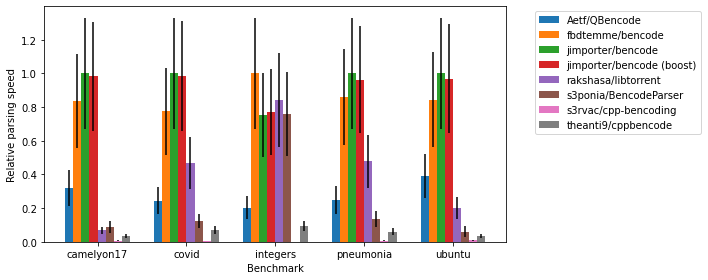

In [12]:
ax = plot_comparison(results_value, figsize=(10, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../../docs/images/benchmark-decoding-value.svg")

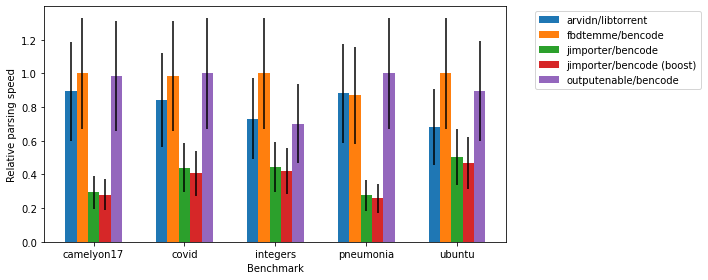

In [13]:
ax = plot_comparison(results_view, figsize=(10, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../../docs/images/benchmark-decoding-view.svg")